In [8]:
import nibabel as nib
import numpy as np 
import matplotlib.pyplot as plt
import math
import cv2
import os
import pandas as pd
from PIL import Image
import matplotlib as mpl

In [9]:
#カラーマップを作成
RdWh = mpl.colors.ListedColormap([(0,0,0,0),(1,0,0,1)])

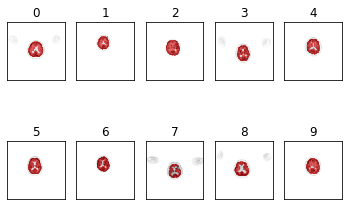

In [10]:
brain1 = []
brain2 = []
path_nii = "C:\\Users\\shink\\seki\\gazou\\seki20211001"
fig = plt.figure()
file_kazu=len(os.listdir(path_nii))
row=2。
col=file_kazu//row

for file_number in range(file_kazu):
    img_file = path_nii+str(file_number)+".nii"
    path=os.path.join(img_file)
    #NIfTI formatの読み込み。
    nib_path = nib.load(path)
    img_data = nib_path.get_fdata().T[::-1]
    ax1 = fig.add_subplot(row,col,file_number+1)
    img2 =img_data[20]
    #閾値を自分で決めて、二値化
    ret,thresh1 = cv2.threshold(img2,3,255,cv2.THRESH_BINARY)
    kara=np.zeros_like(thresh1)
    plt.title(file_number)
    ax1.imshow(img2,cmap="gray_r")
    ax1.imshow(thresh1,cmap=RdWh,alpha=0.5)
    ax1.axes.xaxis.set_visible(False)
    ax1.axes.yaxis.set_visible(False)
    
    brain1_lis = []
    brain2_lis = []
    #色を付ける場所の条件を付けるためのスイッチ
    switch1=0
    switch2=1
    for i, img in enumerate(img_data)
        brain1_lis.append(img)
        ret,thresh1=cv2.threshold(img,3,255,cv2.THRESH_BINARY)
        if 5<img.max():
            switch1=1
        if 5<img.max() and switch1==1 and switch2==1:
            brain2_lis.append(thresh1)
        else:
            brain2_lis.append(kara)
            if switch1==1 and i>10:
                switch2=0
    arr_brain1 = np.array(brain1_lis)
    arr_brain2 = np.array(brain2_lis)
    brain1.append(arr_brain1)
    brain2.append(arr_brain2)

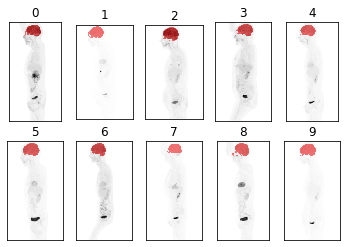

In [11]:
fig = plt.figure()
for file_number in range(file_kazu):
    ax1 = fig.add_subplot(row,col,file_number+1 )
    #MIP画像(最大値をとる)を作成
    arr1 = np.max(brain1[file_number],axis=1)
    arr2 = np.max(brain2[file_number],axis=1)
    ax1.imshow(arr1,cmap="gray_r")
    ax1.imshow(arr2,cmap=RdWh,alpha=0.5)
    
    plt.title(file_number)
    ax1.axes.xaxis.set_visible(False)
    ax1.axes.yaxis.set_visible(False)